# Research on car sales advertisements



You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Description of the data

The dataset contains the following fields:

price

model_year

model

condition

cylinders

fuel — gas, diesel, etc.

odometer — the vehicle's mileage when the ad was published
transmission

paint_color

is_4wd — whether the vehicle has 4-wheel drive (Boolean type)

date_posted — the date the ad was published

days_listed — from publication to removal

## Study the general information. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('vehicles_us.csv')

In [3]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [6]:
df['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

Conclusion

Data concists of 13 columns and 51525 rows. 5 columns have missing values. Seems that column is_4wd should be changed to boolean and '0' added, as now we have one option and half of the values missed. Other values looks reasonable, we just need to check outliers like min for year and max for price/odometer - are their values copmarable with other description of the vehicles in the advertisement.

## Data preprocessing

In [7]:
df['is_4wd'].fillna(value = 0,inplace = True)

In [8]:
df['is_4wd'] = df['is_4wd'].astype('bool')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


First of all, i filled empty rows of 'is_4wd' column with '0' and converted to boolean. Only option there was '1', most propably, when filling the form, people marked this field only when they could say 'is_4wd' about the car. For instance, cars with '2d' in the name had empty field in this column.

Columns 'model_year' and 'odometr' are important for detecting a price. Also they are dependent on each other - the lower the year, the higher the 'odometr' number. We have 548 positions with empty rows for both columnts, which is around 1% of all data. Most of them - on gasoline fuel, this is also similar to all data. so more likely its reasonable to drop them as we don't have enough parameters for calculations plus too risky too fill them just by price and model.
All others empty fields in columns 'model_year' and 'odometr' is reasonable to fill with means calculated per year.

In [10]:
print(df['fuel'].value_counts())

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64


this column looks good enough - no missing values; gasoline is the most popular fuel, next diesel, as it should be.

In [11]:
df.groupby('model_year').count()

,price,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
model_year,,,,,,,,,,,,
1908.0,2,2,2,2,2,1,2,2,2,2,2,2
1929.0,1,1,1,1,1,0,1,1,1,1,1,1
1936.0,1,1,1,1,1,1,1,1,1,1,1,1
1948.0,1,1,1,1,1,1,1,1,1,1,1,1
1949.0,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2015.0,3323,3323,3323,2966,3323,2809,3323,3323,2710,3323,3323,3323
2016.0,2954,2954,2954,2658,2954,2510,2954,2954,2402,2954,2954,2954
2017.0,2419,2419,2419,2162,2419,2040,2419,2419,1995,2419,2419,2419


In [12]:
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [13]:
df['cylinders'].median()

6.0

In [14]:
df.loc[df['cylinders']== 0, 'cylinders'] = 6
df['cylinders'].fillna(value = 6,inplace = True)
df['cylinders'] = df['cylinders'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 4.8+ MB


Decided to replace with median, failed to change it in normal way

#here we fill missed values with '0' to remove them. as this column is not important for now, plus we don't have any column like engine size to fill this missing values

In [15]:
print(df['condition'].unique())

['good' 'like new' 'fair' 'excellent' 'salvage' 'new']


In [16]:
print(df['model'].value_counts())

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64


In [17]:
print(df['paint_color'].value_counts())
df['paint_color'].fillna(value = 'noinfo',inplace = True)

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64


Color is clear enough, all of them separate colors. noinfo - to replace missing

In [18]:
print(df['type'].value_counts())
print()
print(df['type'].value_counts().index)

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

Index(['SUV', 'truck', 'sedan', 'pickup', 'coupe', 'wagon', 'mini-van',
       'hatchback', 'van', 'convertible', 'other', 'offroad', 'bus'],
      dtype='object')


some of the models has different types. sometimes it can be as it is - like hatchback and sedan types for one model. but when one clearly defined model has the types - wagon, van and mini-van - more likely its same type of the model, so they can be replaced by one of them.

In [19]:
print(df['transmission'].value_counts())

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64


here is also everything good

In [20]:
print(df['odometer'].value_counts().head(250))

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
31100.0      21
223000.0     20
228000.0     20
5031.0       20
217000.0     20
Name: odometer, Length: 250, dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  bool   
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 4.8+ MB


In [22]:
pivot_1_2 = df.pivot_table(index='model_year', values='odometer', aggfunc='mean')
print(pivot_1_2.tail(20))

                 odometer
model_year               
2000.0      174683.634315
2001.0      176735.451748
2002.0      158508.842286
2003.0      162071.751024
2004.0      158872.435047
2005.0      151960.236054
2006.0      151854.205637
2007.0      144958.583001
2008.0      141790.299264
2009.0      132707.089875
2010.0      127865.910474
2011.0      125142.825966
2012.0      112614.014666
2013.0      103403.558132
2014.0       93699.084308
2015.0       82501.745817
2016.0       61455.480876
2017.0       47557.926471
2018.0       25231.253908
2019.0       17076.810976


In [23]:
pivot_2_2 = df.pivot_table(index='odometer', values='model_year', aggfunc='median')
print(pivot_2_2)

          model_year
odometer            
0.0           2009.0
1.0           2007.0
2.0           2005.0
3.0           2011.0
5.0           2018.0
...              ...
840000.0      2010.0
866000.0      2014.0
920000.0      1996.0
980000.0      2014.0
990000.0      1988.5

[16900 rows x 1 columns]


In [24]:
df['odometer'].max()

990000.0

In [25]:
print(df.sort_values(by = 'odometer', ascending=False).head(30))

       price  model_year                  model  condition  cylinders    fuel  \
17869  59900      1964.0     chevrolet corvette   like new          6     gas   
40729   4700      2013.0        chevrolet cruze       good          6     gas   
48962  40000      2014.0               ram 3500  excellent          6  diesel   
14245   6000      1996.0               ram 2500       good         10     gas   
2840   18500      2014.0          ford explorer  excellent          6     gas   
32973   5550      2010.0         toyota corolla  excellent          6     gas   
2440    5300      2010.0         toyota corolla  excellent          4     gas   
13027   8500      2015.0       chevrolet malibu  excellent          4     gas   
41699  10300      2013.0            ford escape  excellent          6     gas   
5735    7500      2015.0        hyundai elantra  excellent          4     gas   
33578  12995      2014.0           chrysler 300   like new          6     gas   
17816  20000      2011.0    

as we can see here, high values for odometer looks reasonable, all of them not like 1-2 years old. probably cars used for work or just old.

In [26]:
df['model_year'] = df['model_year'].fillna(df.groupby(['model'])['model_year'].transform('median'))

In [27]:
df['odometer'] = df['odometer'].fillna(df.groupby(['model'])['odometer'].transform('median'))

In [28]:
df['odometer'].isnull().sum()

41

In [29]:
df.loc[df['odometer'].isna(), 'odometer'] = df['odometer'].median()
df['odometer'] = df['odometer'].astype('int')

In [30]:
#df.loc[df['model_year'].isna(), 'model_year'] = df['model_year'].median()
df['model_year'] = df['model_year'].astype('int')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  bool  
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
dtypes: bool(1), int64(5), object(7)
memory usage: 4.8+ MB


Types converted, missing values - deleted and filled in.
Duplicates - same cars, but different advertisements - kept.

## Make calculations and add them to the table

* Day of the week, month, and year the ad was placed
* 		The vehicle's age (in years) when the ad was placed

In [32]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,noinfo,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,noinfo,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


In [33]:
df['weekday'] = pd.DatetimeIndex(df['date_posted']).weekday
df['month'] = pd.DatetimeIndex(df['date_posted']).month
df['year'] = pd.DatetimeIndex(df['date_posted']).year


In [34]:
df['age'] = df['year'] - df['model_year'] + 1

In [35]:
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age
12705,6700,2007,chevrolet suburban,good,8,gas,185000,automatic,SUV,grey,False,2018-05-14,28,0,5,2018,12
19616,6950,2009,nissan murano,good,6,gas,122000,automatic,SUV,brown,True,2018-09-29,25,5,9,2018,10
14962,13490,2012,ford econoline,good,8,gas,80836,automatic,truck,white,False,2018-08-15,33,2,8,2018,7
22753,22950,2014,chevrolet silverado 1500,like new,6,gas,87274,automatic,pickup,noinfo,True,2018-09-01,81,5,9,2018,5
10984,4999,2007,chevrolet silverado,excellent,6,gas,142000,automatic,pickup,white,False,2019-02-22,22,4,2,2019,13


* 		The vehicle's average mileage per year

In [36]:
def ave_mile(row):
    if row['age'] == 0:
        return row['odometer']
    else:
        return row['odometer']/row['age']
        

In [37]:
df['odometer_per_year'] = df.apply(ave_mile, axis=1)

In [38]:
df['odometer_per_year'] = df['odometer_per_year'].astype('int')
df.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,odometer_per_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,noinfo,True,2018-06-23,19,5,6,2018,8,18125
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,noinfo,False,2019-03-22,9,4,3,2019,17,7172
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26967


In the condition column, replace string values with a numeric scale:
* 		new = 5
* 		like new = 4
* 		excellent = 3
* 		good = 2
* 		fair = 1
* 		salvage = 0

In [39]:
def condition_num(row):
    x = row['condition']
    if x == 'new':
        return 5
    if x == 'like new':
        return 4
    if x == 'excellent':
        return 3
    if x == 'good':
        return 2
    if x == 'fair':
        return 1
    else:
        return 0

In [40]:
df['condition'] = df.apply(condition_num, axis=1)

In [41]:
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,odometer_per_year
29973,35995,2018,jeep wrangler unlimited,3,6,gas,79485,automatic,SUV,blue,True,2018-10-09,9,1,10,2018,1,79485
5873,4490,2002,honda civic lx,3,4,gas,90069,automatic,sedan,white,False,2019-03-16,51,5,3,2019,18,5003
16517,14995,2012,buick enclave,3,6,gas,68762,automatic,SUV,red,True,2018-09-15,78,5,9,2018,7,9823
8337,5699,2012,nissan sentra,3,4,gas,102812,manual,sedan,blue,False,2018-08-26,22,6,8,2018,7,14687
30775,1,2015,jeep grand cherokee,3,8,gas,122390,automatic,SUV,black,True,2018-07-07,18,5,7,2018,4,30597
5472,13435,2015,chevrolet colorado,2,4,gas,77400,automatic,truck,white,False,2018-06-06,19,2,6,2018,4,19350
12467,19900,2011,ford f-150,3,6,gas,112932,automatic,truck,white,True,2018-07-31,2,1,7,2018,8,14116
26734,17885,2015,gmc sierra,3,8,gas,16926,automatic,truck,white,False,2018-09-16,41,6,9,2018,4,4231
34509,26995,2014,jeep wrangler unlimited,3,6,gas,79485,automatic,offroad,white,True,2018-07-09,66,0,7,2018,5,15897
31952,7995,2011,toyota rav4,3,6,gas,194706,automatic,SUV,black,False,2018-12-14,44,4,12,2018,8,24338


## Carry out exploratory data analysis

Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.


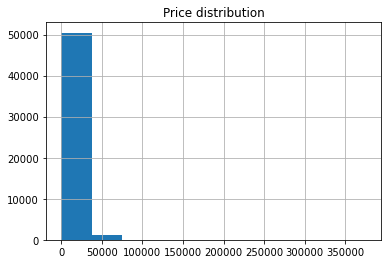

In [42]:
df['price'].hist()
plt.title('Price distribution')
plt.show()

We see outliers with price higher than 50 th

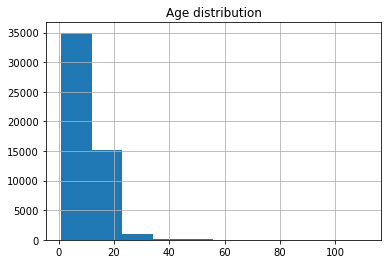

In [43]:
df['age'].hist()
plt.title('Age distribution')
plt.show()

older than 20 yo

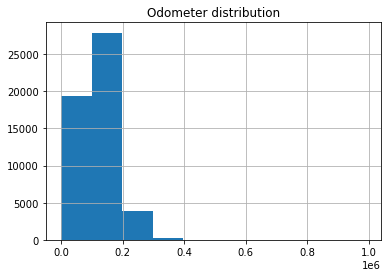

In [44]:
df['odometer'].hist()
plt.title('Odometer distribution')
plt.show()

more than 300 th 

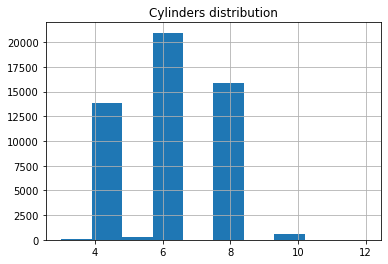

In [45]:
df['cylinders'].hist()
plt.title('Cylinders distribution')
plt.show()

4 6 and 8 - most popular

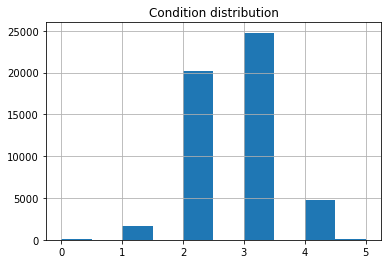

In [46]:
df['condition'].hist()
plt.title('Condition distribution')
plt.show()

0 and 5 are rare

### Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data

#### Price

In [47]:
df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

Main price range is 2000 - 22000

(0.0, 35000.0)

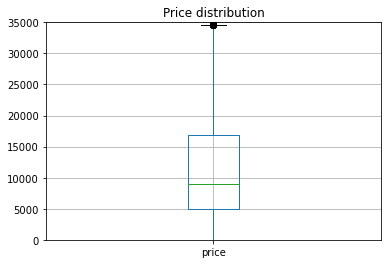

In [48]:
df.boxplot(column='price')
plt.title('Price distribution')
plt.ylim(0,35000)

Look on boxplot and filter by 'borders' - from 0 to 35000

In [49]:
df_filtered = df.query('price <= 35000')

#### Age

In [50]:
df['age'].describe()

count    51525.000000
mean         9.513906
std          6.112976
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: age, dtype: float64

average age are between 2 and 15 years

(0.0, 24.0)

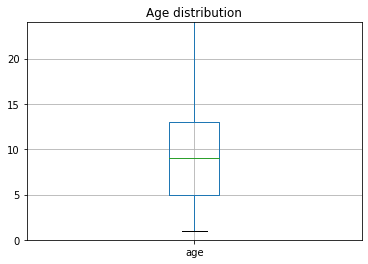

In [51]:
df.boxplot(column='age')
plt.title('Age distribution')
plt.ylim(0,24)

In [52]:
df_filtered = df.query('age <= 24')

#### Odometer

In [53]:
df['odometer'].describe()

count     51525.000000
mean     115338.084639
std       60614.502047
min           0.000000
25%       77100.000000
50%      115376.000000
75%      148177.000000
max      990000.000000
Name: odometer, dtype: float64

Text(0.5, 1.0, 'Odometer distribution')

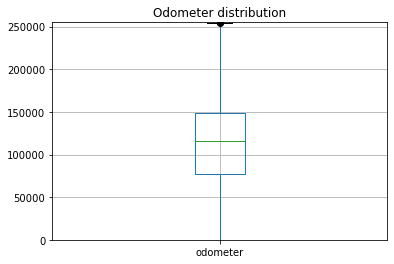

In [54]:
df.boxplot(column='odometer')
plt.ylim(0, 255000)
plt.title('Odometer distribution')

Look on boxplot and filter by 'borders' - from 0 to 255000

In [55]:
df_filtered = df.query('odometer <= 255000')

#### Cylinders

In [56]:
df['cylinders'].describe()

count    51525.000000
mean         6.112450
std          1.573784
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Most values are 4 - 8

Text(0.5, 1.0, 'Cylinders distribution')

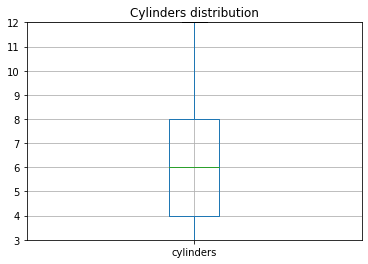

In [57]:
df.boxplot(column='cylinders')
plt.ylim(3,12)
plt.title('Cylinders distribution')

In [58]:
df_filtered = df.query('3 <= cylinders <= 12')

#### Condition

In [59]:
df['condition'].describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

Text(0.5, 1.0, 'Condition distribution')

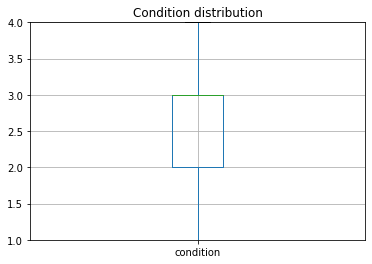

In [60]:
df.boxplot(column='condition')
plt.ylim(1, 4)
plt.title('Condition distribution')

In [61]:
df_filtered = df.query('1 <= condition <= 4')

In [62]:
df_filtered = df.query('1 <= condition <= 4 and 3 <= cylinders <= 12 and odometer <= 255000 and age <= 24 and price <= 35000')

In [63]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48151 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              48151 non-null  int64         
 1   model_year         48151 non-null  int64         
 2   model              48151 non-null  object        
 3   condition          48151 non-null  int64         
 4   cylinders          48151 non-null  int64         
 5   fuel               48151 non-null  object        
 6   odometer           48151 non-null  int64         
 7   transmission       48151 non-null  object        
 8   type               48151 non-null  object        
 9   paint_color        48151 non-null  object        
 10  is_4wd             48151 non-null  bool          
 11  date_posted        48151 non-null  datetime64[ns]
 12  days_listed        48151 non-null  int64         
 13  weekday            48151 non-null  int64         
 14  month 

### Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram

After remowing outliers and plotting new histograms with df_filterd, we can see different groups of data

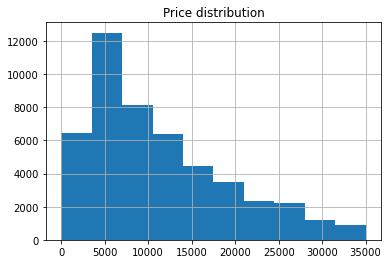

In [64]:
df_filtered['price'].hist()
plt.title('Price distribution')
plt.show()

Biggest group has price around 5000. From 10000 amount of cars are stedily decreasing.

In [65]:
df_filtered['price'].describe()


count    48151.000000
mean     11378.167494
std       7971.903148
min          1.000000
25%       5000.000000
50%       8995.000000
75%      15995.000000
max      35000.000000
Name: price, dtype: float64

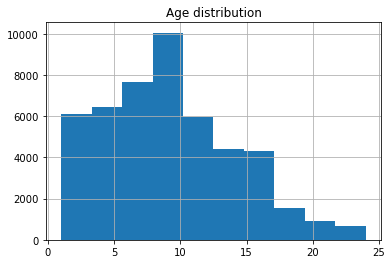

In [66]:
df_filtered['age'].hist()
plt.title('Age distribution')
plt.show()

The most popular age for selling a car is 5 years. Next, each is twice smaller, goes age from 0 to 15. Less then a 1000 are in groups of 18-24 years

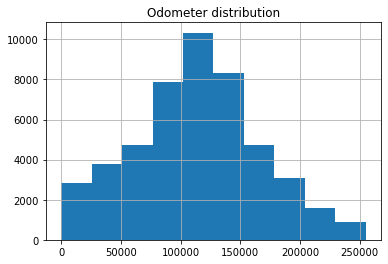

In [67]:
df_filtered['odometer'].hist()
plt.title('Odometer distribution')
plt.show()

14000 cars are sold with mileage 100-120 th. km. Half of cars with 80 - 150 th. km on odometer.

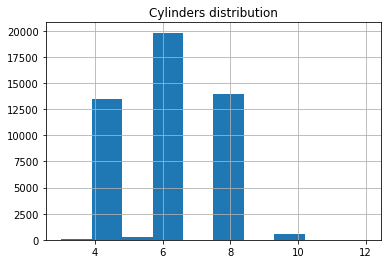

In [68]:
df_filtered['cylinders'].hist()
plt.title('Cylinders distribution')
plt.show()

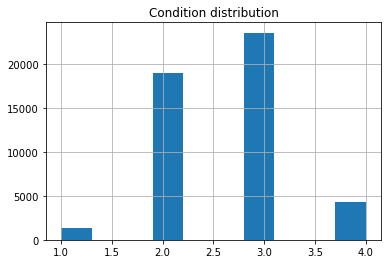

In [69]:
df_filtered['condition'].hist()
plt.title('Condition distribution')
plt.show()

Two most popular conditions to sell cars is 3 and 2 = excellent and good.

### Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time

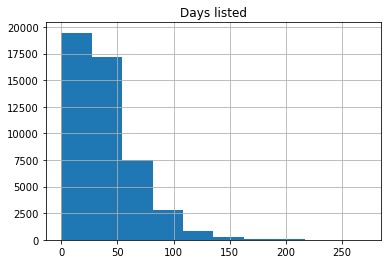

In [70]:
df_filtered['days_listed'].hist()
plt.title('Days listed')
plt.show()

In [71]:
df_filtered['days_listed'].describe()

count    48151.000000
mean        39.536749
std         28.202404
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [72]:
df_filtered['days_listed'].median()

33.0

In [73]:
df_filtered['days_listed'].tail()

51519    89
51520    37
51522    32
51523    71
51524    10
Name: days_listed, dtype: int64

In [74]:
df_filtered_2 = df.query('days_listed <= 9')

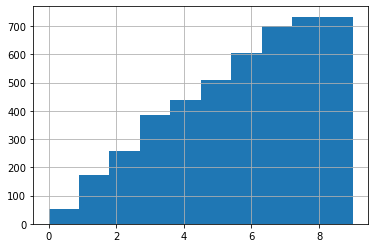

In [75]:
df_filtered_2['days_listed'].hist()
plt.show()

Mostly advertisements were displayed (days_listed) from 10 days to 2.5 months. Mean is 39,5 days, median - 33. Standart deviation - 28. Only small number od ads were displayed less than a week, or more than 3 months. At the same time there are advertisements, which were placed about the same car, few times(same description + same odometer not equal rounded number). This means that in fact more cars were on sale for a longer period of time.



#### Determine when ads were removed quickly, and when they were listed for an abnormally long time
days_listed	weekday	month	year	age
All advertisements were placed in the years 2018-2019. No correlation with days of the week. At the same time, there is difference between months.  
During the year number stays stable. There is gap in april, almost twicw lower than average.

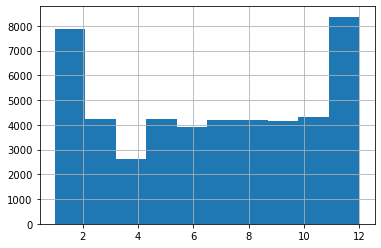

In [76]:
df_filtered['month'].hist()
plt.show()

In [77]:
df_month = df_filtered.pivot_table(index='month', values='price', aggfunc='count')

In [78]:
df_month

,price
month,
1,4147
2,3736
3,4251
4,2631
5,4232
6,3921
7,4193
8,4181
9,4173


In [79]:
df_filtered.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,age,odometer_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,noinfo,True,2018-06-23,19,5,6,2018,8,18125
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714
3,1500,2003,ford f-150,1,8,gas,121928,automatic,pickup,noinfo,False,2019-03-22,9,4,3,2019,17,7172
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26967


In [80]:
df_filtered.pivot_table(index='year', values='days_listed', aggfunc=['count', 'mean'])

,count,mean
,days_listed,days_listed
year,,
2018,33386,39.325136
2019,14765,40.015239


In [81]:
df_filtered['days_listed'].describe()

count    48151.000000
mean        39.536749
std         28.202404
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

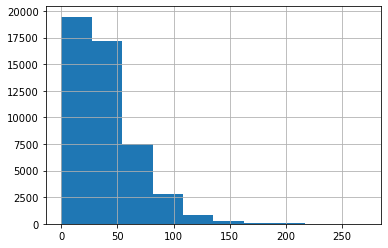

In [82]:
df_filtered['days_listed'].hist()
plt.show()

Mean for days listed is 39 days, doesn't matter in which day of the week, month or year it was posted.

In [83]:
df_filtered_short = df.query('days_listed <= 2')

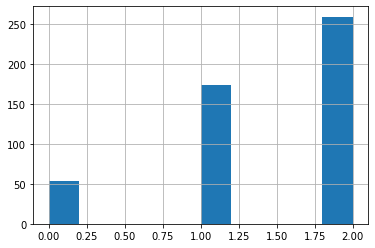

In [84]:
df_filtered_short['days_listed'].hist()
plt.show()

In [85]:
df_filtered_short.pivot_table(index='year', values='price', aggfunc='count')

,price
year,
2018,338
2019,148


In [86]:
df_filtered_long = df.query('days_listed >= 120')

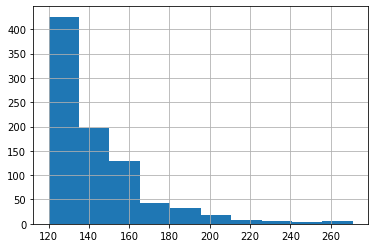

In [87]:
df_filtered_long['days_listed'].hist()
plt.show()

In [88]:
df_filtered_long.pivot_table(index='month', values='price', aggfunc='count')

,price
month,
1,74
2,89
3,76
4,45
5,80
6,73
7,73
8,62
9,80


In 2018 were posted twice more ads than in 2019. Mean for days listed is 39 days, doesn't matter in which day of the week, month or year it was posted. Most advertisements were displayed (days_listed) from 10 days to 2.5 months. With less than 3 and more than 120 days numbers strongly decrease, so removed as outliers.

### Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

In [89]:
df_type = df_filtered.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])

In [90]:
df_type

,count,mean
,price,price
type,,
SUV,11860,10550.141737
bus,21,18107.428571
convertible,338,13084.289941
coupe,2007,13649.123069
hatchback,996,6851.245984
mini-van,1138,8057.882250
offroad,184,14568.298913
other,233,10542.137339


In [91]:
df_type.columns = ['count', 'mean_price']

<AxesSubplot:xlabel='type'>

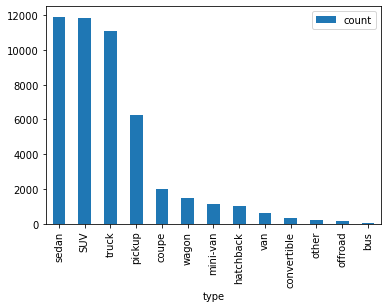

In [92]:
df_type.sort_values(by='count', ascending=False).plot(y='count', kind='bar')

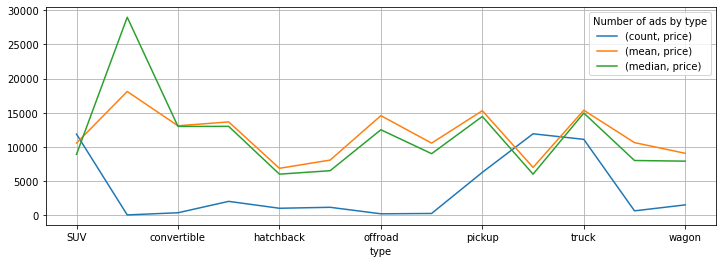

In [111]:
df_type = df_filtered.pivot_table(index='type', values='price', aggfunc=['count', 'mean', 'median'])
df_type.plot(grid=True, figsize=(12,4))
plt.legend(title='Number of ads by type')
plt.show()

The two types with the greatest number of ads are SUV and sedan with almost 12th each (11860 and 11908 accordingly). At the same time mean price for SUV is much higher - 10550, while for sedan is 6983.


### What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.


In [94]:
print(df['type'].value_counts().index)

Index(['SUV', 'truck', 'sedan', 'pickup', 'coupe', 'wagon', 'mini-van',
       'hatchback', 'van', 'convertible', 'other', 'offroad', 'bus'],
      dtype='object')


In [95]:
df_filtered_SUV = df_filtered.loc[df_filtered['type'] == 'SUV']
df_filtered_SUV.describe()

,price,model_year,condition,cylinders,odometer,days_listed,weekday,month,year,age,odometer_per_year
count,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.00000,11860.000000,11860.000000,11860.000000,11860.000000
mean,10550.141737,2009.875632,2.693929,5.877234,117938.217875,39.779511,2.99258,6.639292,2018.309781,9.434148,15144.518044
std,7205.484474,4.858722,0.665926,1.338654,51497.007377,28.247518,2.00525,3.480916,0.462423,4.875234,10524.253376
min,1.000000,1995.000000,1.000000,3.000000,0.000000,0.000000,0.00000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,86793.000000,19.000000,1.00000,3.000000,2018.000000,6.000000,9898.750000
50%,8900.000000,2010.000000,3.000000,6.000000,121558.000000,33.000000,3.00000,7.000000,2018.000000,9.000000,13190.500000
75%,14799.000000,2014.000000,3.000000,6.000000,150000.000000,54.000000,5.00000,10.000000,2019.000000,12.000000,17660.250000
max,35000.000000,2019.000000,4.000000,10.000000,255000.000000,243.000000,6.00000,12.000000,2019.000000,24.000000,195700.000000


In [96]:
df_filtered_SUV.corr()


,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,odometer_per_year
price,1.000000,0.574878,0.255056,0.000888,-0.480809,0.115390,-0.019037,0.008733,-0.007276,0.002221,-0.572721,0.214903
model_year,0.574878,1.000000,0.303920,-0.268305,-0.561211,-0.069062,-0.015800,0.002190,-0.015262,0.011820,-0.995492,0.477806
condition,0.255056,0.303920,1.000000,-0.088788,-0.298030,-0.012239,-0.011070,0.008277,0.001478,-0.002874,-0.303164,0.074092
cylinders,0.000888,-0.268305,-0.088788,1.000000,0.226637,0.117605,0.014954,-0.012088,-0.003460,0.000823,0.267474,-0.107933
odometer,-0.480809,-0.561211,-0.298030,0.226637,1.000000,0.024974,0.012227,0.004646,0.010346,-0.007517,0.558597,0.126927
is_4wd,0.115390,-0.069062,-0.012239,0.117605,0.024974,1.000000,-0.005574,0.016100,-0.002009,-0.006464,0.068215,-0.029214
days_listed,-0.019037,-0.015800,-0.011070,0.014954,0.012227,-0.005574,1.000000,-0.010664,-0.007448,0.000904,0.015832,-0.010626
weekday,0.008733,0.002190,0.008277,-0.012088,0.004646,0.016100,-0.010664,1.000000,0.019864,-0.016982,-0.003793,0.002176
month,-0.007276,-0.015262,0.001478,-0.003460,0.010346,-0.002009,-0.007448,0.019864,1.000000,-0.816955,-0.062279,0.082053
year,0.002221,0.011820,-0.002874,0.000823,-0.007517,-0.006464,0.000904,-0.016982,-0.816955,1.000000,0.083072,-0.104965


In [97]:
df_filtered_sedan = df_filtered.loc[df_filtered['type'] == 'sedan']
df_filtered_sedan.describe()


,price,model_year,condition,cylinders,odometer,days_listed,weekday,month,year,age,odometer_per_year
count,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000,11908.000000
mean,6983.578435,2010.920474,2.709439,4.719852,105979.332885,39.389150,2.988663,6.634363,2018.304837,8.384363,15320.793248
std,4234.207767,4.446161,0.685220,1.086323,48884.841096,28.237336,2.003220,3.480042,0.460358,4.459647,10543.570592
min,1.000000,1995.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,3995.000000,2008.000000,2.000000,4.000000,76829.000000,19.000000,1.000000,3.000000,2018.000000,5.000000,9758.000000
50%,5995.000000,2012.000000,3.000000,4.000000,104122.000000,33.000000,3.000000,7.000000,2018.000000,8.000000,13285.000000
75%,9000.000000,2014.000000,3.000000,6.000000,135000.000000,53.000000,5.000000,10.000000,2019.000000,11.000000,17855.500000
max,32999.000000,2019.000000,4.000000,10.000000,255000.000000,271.000000,6.000000,12.000000,2019.000000,24.000000,131000.000000


In [98]:
df_filtered_sedan.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,weekday,month,year,age,odometer_per_year
price,1.000000,0.619224,0.288343,-0.040720,-0.504747,0.041361,0.002375,-0.003866,-0.019872,0.016037,-0.615696,0.246258
model_year,0.619224,1.000000,0.298514,-0.108473,-0.545081,0.069851,-0.000746,0.002803,-0.028519,0.022431,-0.994660,0.467539
condition,0.288343,0.298514,1.000000,-0.041217,-0.299390,0.020653,-0.008137,-0.002216,-0.008738,0.007917,-0.296794,0.083549
cylinders,-0.040720,-0.108473,-0.041217,1.000000,0.062070,0.198882,0.006506,-0.003351,-0.007392,0.008722,0.109045,-0.040598
odometer,-0.504747,-0.545081,-0.299390,0.062070,1.000000,-0.048852,0.006863,-0.002913,0.017870,-0.007312,0.542677,0.172475
is_4wd,0.041361,0.069851,0.020653,0.198882,-0.048852,1.000000,0.005394,-0.017823,0.006897,-0.003017,-0.069952,0.032044
days_listed,0.002375,-0.000746,-0.008137,0.006506,0.006863,0.005394,1.000000,0.013365,-0.007554,0.013279,0.002115,0.005644
weekday,-0.003866,0.002803,-0.002216,-0.003351,-0.002913,-0.017823,0.013365,1.000000,0.001465,-0.003811,-0.003188,0.005809
month,-0.019872,-0.028519,-0.008738,-0.007392,0.017870,0.006897,-0.007554,0.001465,1.000000,-0.818459,-0.056054,0.095960
year,0.016037,0.022431,0.007917,0.008722,-0.007312,-0.003017,0.013279,-0.003811,-0.818459,1.000000,0.080864,-0.116055


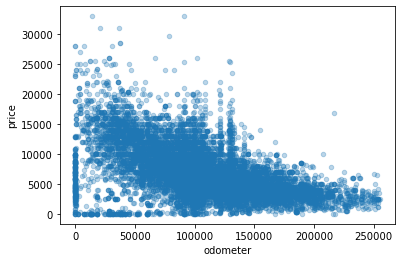

In [112]:
df_filtered_sedan.plot(x='odometer', y='price', kind='scatter', alpha=0.3)
plt.show()

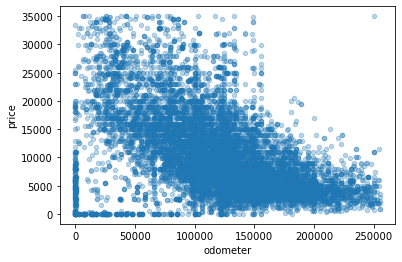

In [113]:
df_filtered_SUV.plot(x='odometer', y='price', kind='scatter', alpha=0.3)
plt.show()

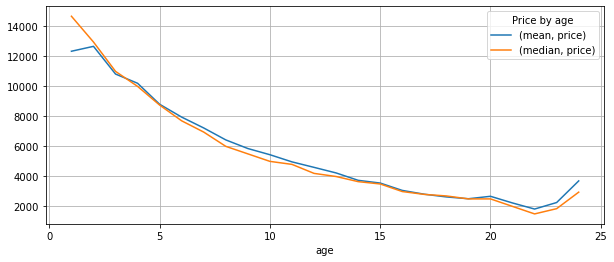

In [114]:
df_type3 = df_filtered_sedan.pivot_table(index='age', values='price', aggfunc=['mean', 'median'])
df_type3.plot(grid=True, figsize=(10,4))
plt.legend(title='Price by age')
plt.show()

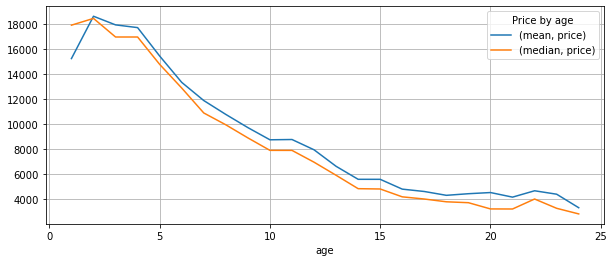

In [115]:
df_type3 = df_filtered_SUV.pivot_table(index='age', values='price', aggfunc=['mean', 'median'])
df_type3.plot(grid=True, figsize=(10,4))
plt.legend(title='Price by age')
plt.show()

#### Box-and-whisker charts for categorical variables:

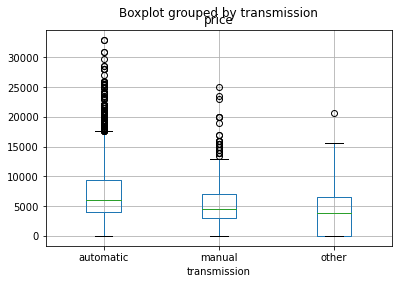

In [116]:
df_filtered_sedan.boxplot(column='price', by='transmission')
plt.show()

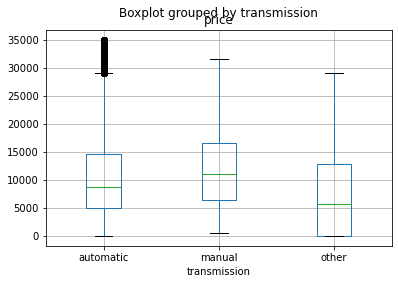

In [117]:
df_filtered_SUV.boxplot(column='price', by='transmission')
plt.show()

Data by transmission nearly equal, plus type other shoud be additionaly examined. Possible types of transmittions like robotics could be only more expensive, so most likely others can be related to one of to groups.

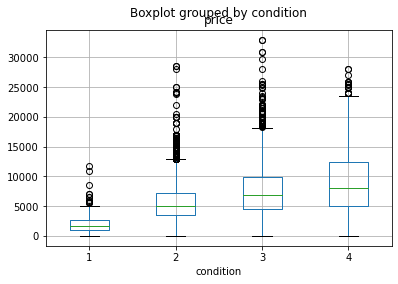

In [118]:
df_filtered_sedan.boxplot(column='price', by='condition')
plt.show()

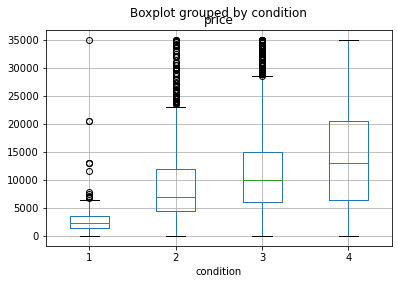

In [119]:
df_filtered_SUV.boxplot(column='price', by='condition')
plt.show()

Correlation for both types is similar, SUVs have wider price range.

In [107]:
df_filtered_sedan.pivot_table(index='paint_color', values='price', aggfunc=['count','mean', 'median', 'min', 'max'])

,count,mean,median,min,max
,price,price,price,price,price
paint_color,,,,,
black,1747,7561.970807,6950,1,32999
blue,1211,6572.038811,5750,1,25947
brown,250,5314.700000,4498,800,22199
custom,291,6401.993127,5495,1,23995
green,201,4795.412935,3900,1,17999
grey,1600,7097.756875,6325,1,29777
noinfo,2142,6939.536881,5995,1,32999
orange,9,10593.888889,8902,1950,21900


In [108]:
df_filtered_SUV.pivot_table(index='paint_color', values='price', aggfunc=['count','mean', 'median', 'min', 'max'])

,count,mean,median,min,max
,price,price,price,price,price
paint_color,,,,,
black,2084,12193.547025,10994.5,1,35000
blue,1008,8559.313492,6992.5,1,34988
brown,352,8768.778409,7488.0,500,34988
custom,297,9306.690236,7999.0,1,35000
green,406,8239.926108,6447.5,1,25950
grey,1147,10480.613775,8500.0,1,34994
noinfo,2140,10607.950000,8800.0,1,35000
orange,81,15041.222222,16900.0,900,30000


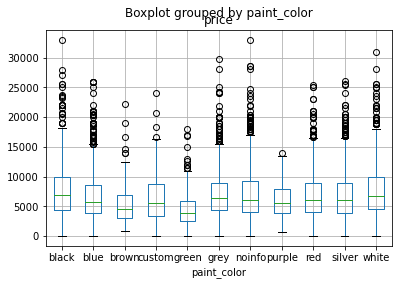

In [120]:
df_filtered_sedan.query("paint_color != 'orange' and paint_color != 'yellow'").boxplot(column='price', by='paint_color')
plt.show()

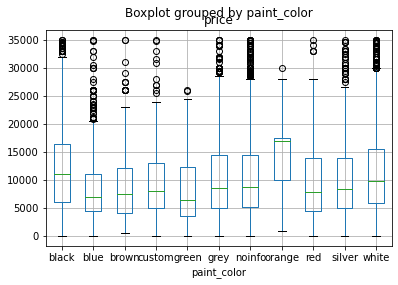

In [121]:
df_filtered_SUV.query("paint_color != 'purple' and paint_color != 'yellow'").boxplot(column='price', by='paint_color')
plt.show()

For sedans - yellow and orange are out of scope. So black is becoming the most expensive. For SUVs colors - yellow and purple has less than 50 positions. So the most expensive group is orange color. Most popular and second in price range is black.

## Overall conclusion

Data consists of advertisements for car sales in 2018-2019. Most advertisements were displayed (days_listed) from 10 days to 2.5 months. Mean is 39,5 days, median - 33. Standard deviation - 28. An only a small number of ads were displayed in less than a week or more than 3 months. At the same time, there are advertisements, which were placed about the same car, few times(same description + same odometer not the equal rounded number). This means that in fact, more cars were on sale for a longer period.
After cleaning data from missing and cutting outliers, it decreased by 9%. Data types mainly were converted from float to int, as data in columns - whole numbers. Plus-type of drive converted to boolean, as we can see frow data, there were no options like front/full/rear, just full - yes or no.
Deleting outliers helped to make histograms look more clear.
The main price range is 2000 - 22000. A clear positive correlation of price is seen with model_year and negative with the odometer. The younger a car, the higher price. The more kilometers on the odometer - the lower price.
The two most popular types are SUVs and sedans, even in the case of grouping together wagon+van+mini-van nothing changes. Different parameters in these two groups shows similar correlation.
Paint color is not the main part of the car price, but we can see some dependence. Two colors - yellow and purple has less than 50 positions for SUV, so are not taken into account. So the most expensive group for SUV is orange color, for the sedan - too fewer cars. The most popular and second in the price range for SUVs is black, for sedans black is in the 1st place.